In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
X_train = np.load(r'D:/FUCK!!/Pattern/Project/notebooks/Feature Extracted/X_train_gray.npy')
y_train = np.load(r'D:/FUCK!!/Pattern/Project/notebooks/Feature Extracted/y_train_gray.npy')

X_test  = np.load(r'D:/FUCK!!/Pattern/Project/notebooks/Feature Extracted/X_test_gray.npy')
y_test  = np.load(r'D:/FUCK!!/Pattern/Project/notebooks/Feature Extracted/y_test_gray.npy')

In [14]:
# Train RandomForest
rf = RandomForestClassifier(n_estimators=200,criterion='entropy', random_state=42,class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"RandomForest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")

RandomForest Accuracy: 0.3140


In [15]:
res = classification_report(y_test, rf_pred)
print(res)

                                  precision    recall  f1-score   support

         Achaemenid architecture       0.42      0.52      0.47        48
American Foursquare architecture       0.26      0.93      0.40        45
        American craftsman style       1.00      0.04      0.08        25
   Ancient Egyptian architecture       0.00      0.00      0.00        23
           Art Deco architecture       0.73      0.27      0.39        30
        Art Nouveau architecture       0.25      0.40      0.31        25
            Baroque architecture       0.17      0.03      0.05        33
            Bauhaus architecture       0.55      0.18      0.27        33
         Beaux-Arts architecture       0.28      0.14      0.19        35
          Byzantine architecture       0.28      0.16      0.20        31

                        accuracy                           0.31       328
                       macro avg       0.39      0.27      0.24       328
                    weighted avg    

In [16]:
conf = confusion_matrix(y_test, rf_pred)
print(conf)

[[25 10  0  1  0  7  0  2  0  3]
 [ 3 42  0  0  0  0  0  0  0  0]
 [ 1 21  1  0  0  1  0  0  0  1]
 [11  7  0  0  2  1  2  0  0  0]
 [ 1 13  0  0  8  2  0  3  2  1]
 [ 1 13  0  0  0 10  0  0  1  0]
 [ 4 11  0  0  0 11  1  0  1  5]
 [ 5 17  0  0  1  1  0  6  2  1]
 [ 1 22  0  0  0  3  2  0  5  2]
 [ 7  7  0  0  0  4  1  0  7  5]]


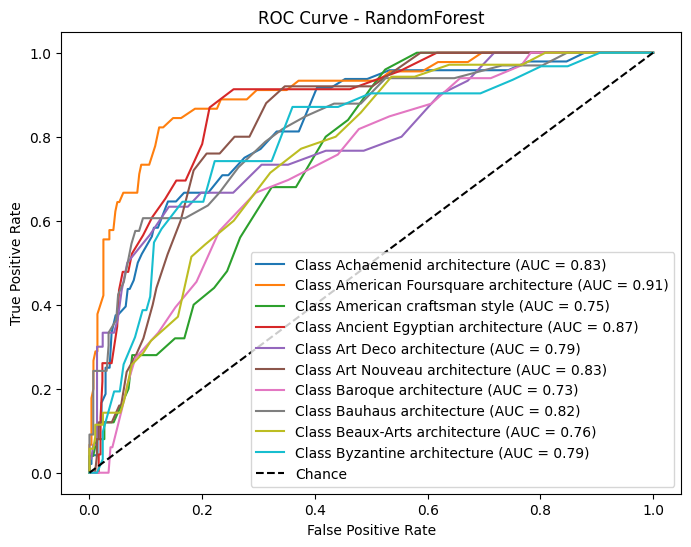

In [18]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
rf_probs = rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_name in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], rf_probs[:, i])

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_name} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForest')
plt.legend()
plt.show()